# Importing Packages

In [ ]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button");
     btn.click()
     }

   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect");
     btn.click()
     }
  }

setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

# Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

# Importing Dataset

In [ ]:
#main_path = "/content/drive/MyDrive/archive (3)/chest_xray"
main_path = "/content/drive/MyDrive/archive (3)/chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

In [ ]:
df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
5287  Pneumonia   
5288  Pneumonia   
5289  Pneumonia   
5290  Pneumonia   
5291  Pneumonia   

                                                                                         image  
0          /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-3373762-0001.jpeg  
1           /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-339692-0002.jpeg  
2          /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-3411116-0001.jpeg  
3          /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-3482198-0003.jpeg  
4           /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-332359-0001.jpeg  
...                                                                                        ...  
5287  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-4342499-0004.jpeg  
5288  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-4371619-0002.jpeg  
5289  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-4382654-0001.jpeg  
5290  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-4338635-0003.jpeg  
5291  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-4368689-0002.jpeg  

[5292 rows x 2 columns]

In [ ]:
df_test

class  \
0       Normal   
1       Normal   
2       Normal   
3       Normal   
4       Normal   
..         ...   
619  Pneumonia   
620  Pneumonia   
621  Pneumonia   
622  Pneumonia   
623  Pneumonia   

                                                                                    image  
0      /content/drive/MyDrive/archive (3)/chest_xray/test/NORMAL/NORMAL-1110860-0001.jpeg  
1      /content/drive/MyDrive/archive (3)/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg  
2      /content/drive/MyDrive/archive (3)/chest_xray/test/NORMAL/NORMAL-2233350-0001.jpeg  
3      /content/drive/MyDrive/archive (3)/chest_xray/test/NORMAL/NORMAL-1759114-0001.jpeg  
4       /content/drive/MyDrive/archive (3)/chest_xray/test/NORMAL/NORMAL-159472-0001.jpeg  
..                                                                                    ...  
619   /content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/VIRUS-820420-0001.jpeg  
620  /content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/VIRUS-9968655-0001.jpeg  
621  /content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg  
622  /content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/VIRUS-8314555-0001.jpeg  
623  /content/drive/MyDrive/archive (3)/chest_xray/test/PNEUMONIA/VIRUS-8435135-0001.jpeg  

[624 rows x 2 columns]

# Data Exploration

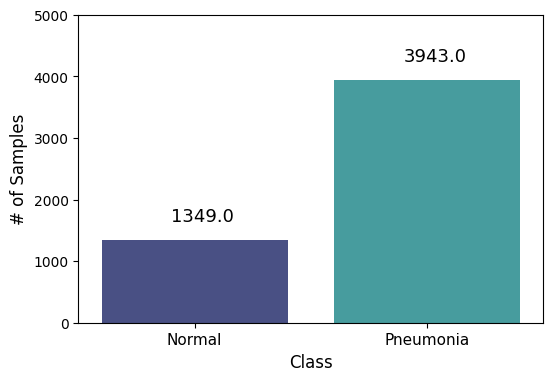

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

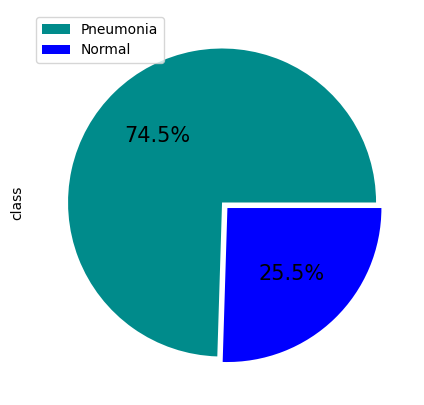

In [ ]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

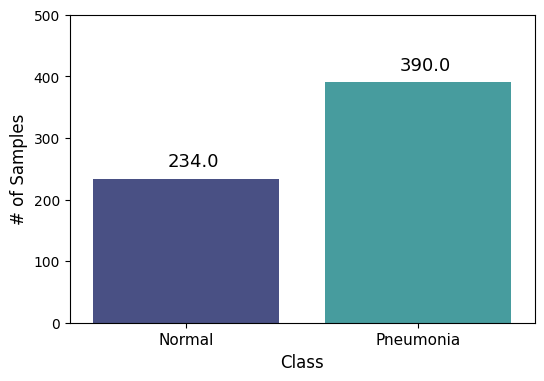

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

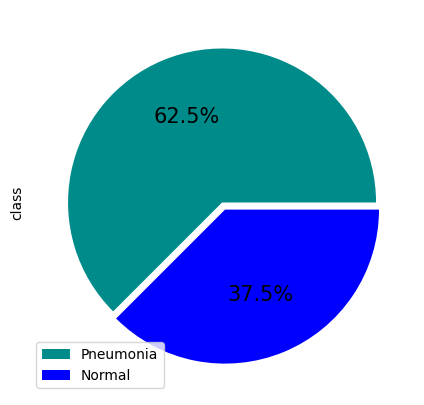

In [ ]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

The distributions from these datasets are a little different from each other. Both are slightly imbalanced, having more samples from the positive class (Pneumonia), with the training set being a little more imbalanced.

Before we move on to the next section, we will take a look at a few examples from each dataset.

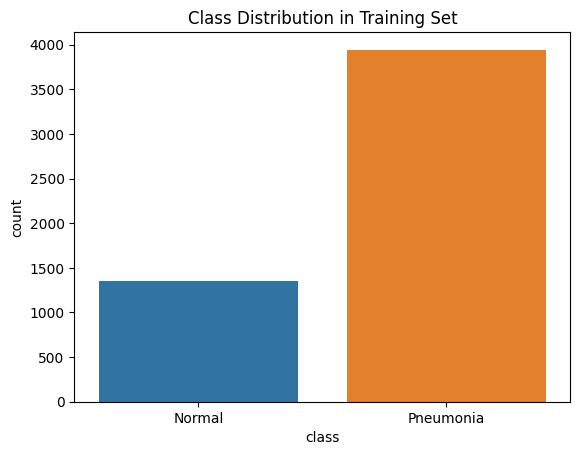

In [ ]:
# Explore class distribution
sns.countplot(x='class', data=df_train)
plt.title('Class Distribution in Training Set')
plt.show()

# Data Visualization

Train Set - Normal


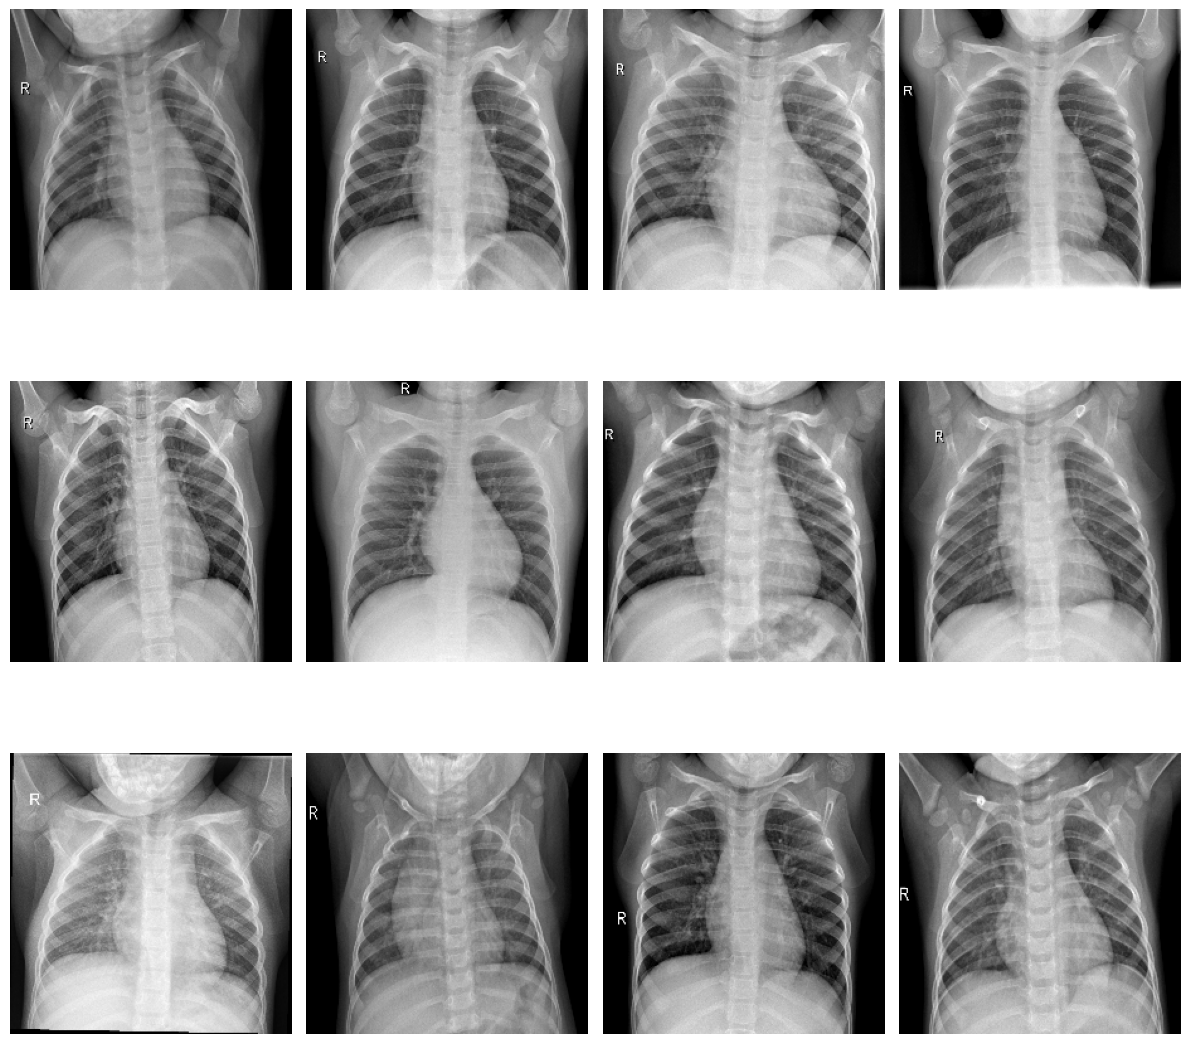

In [ ]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


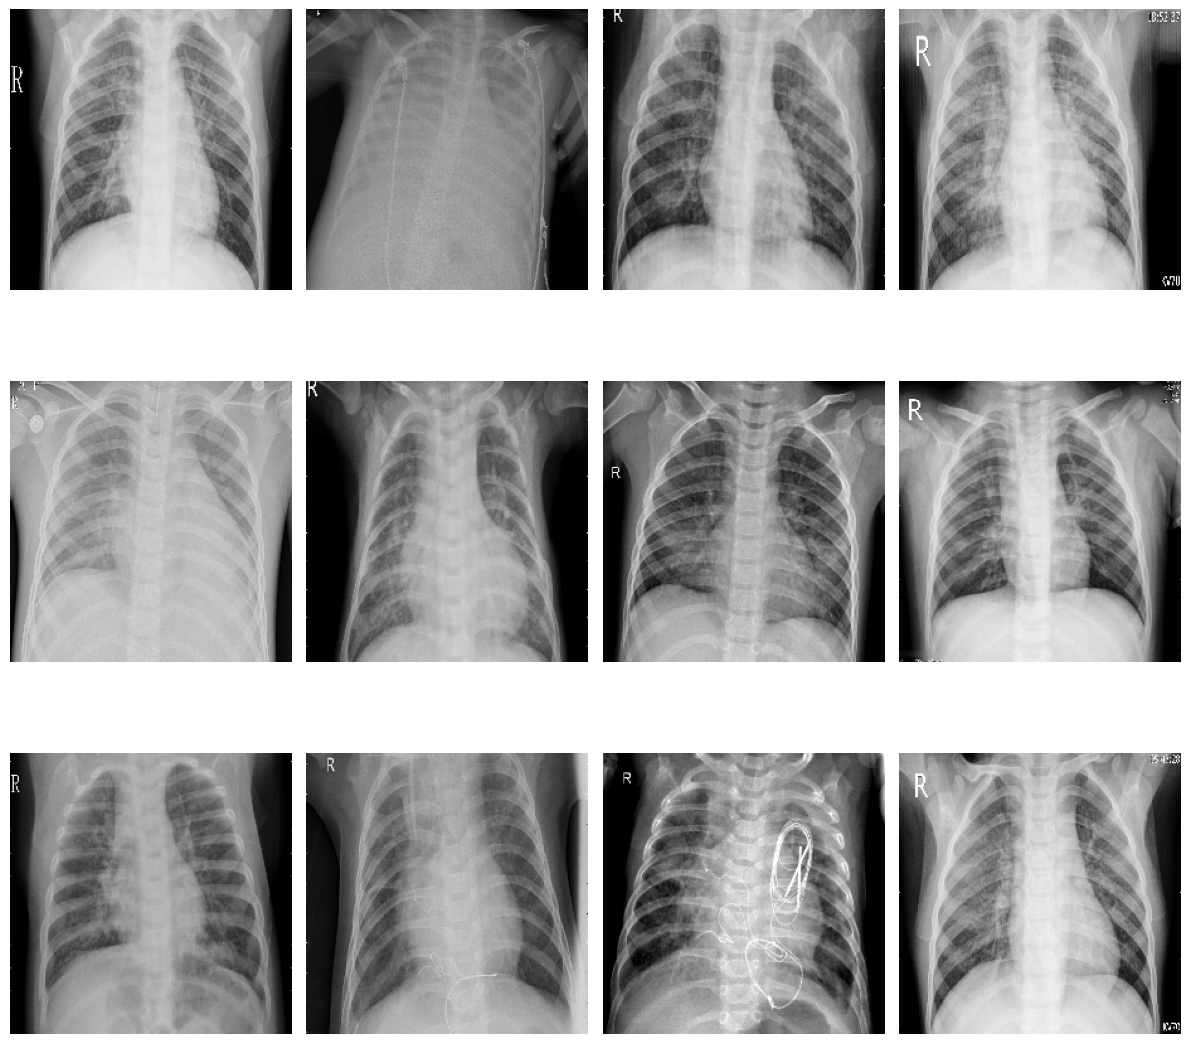

In [ ]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


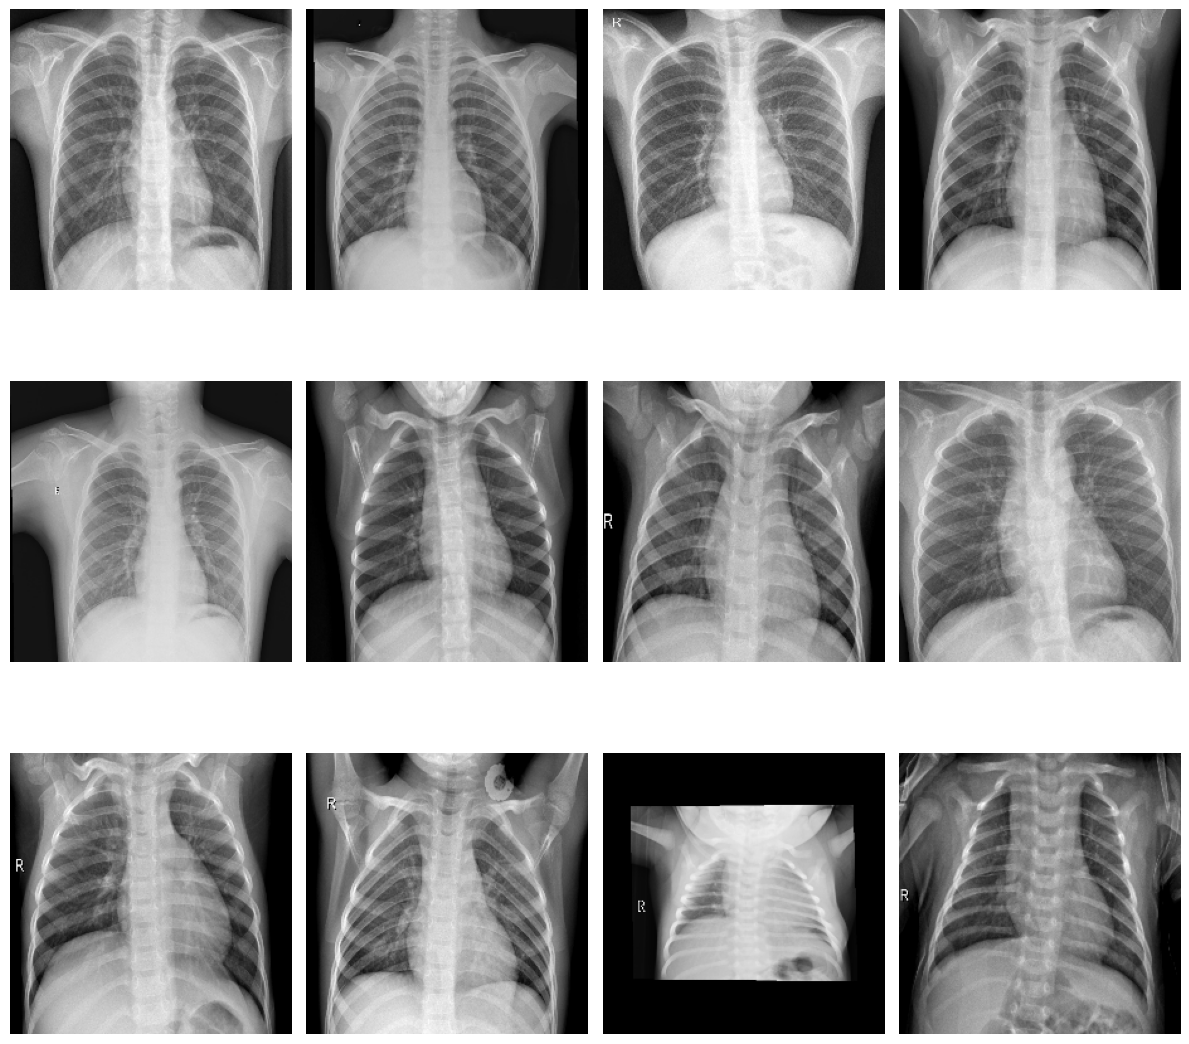

In [ ]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


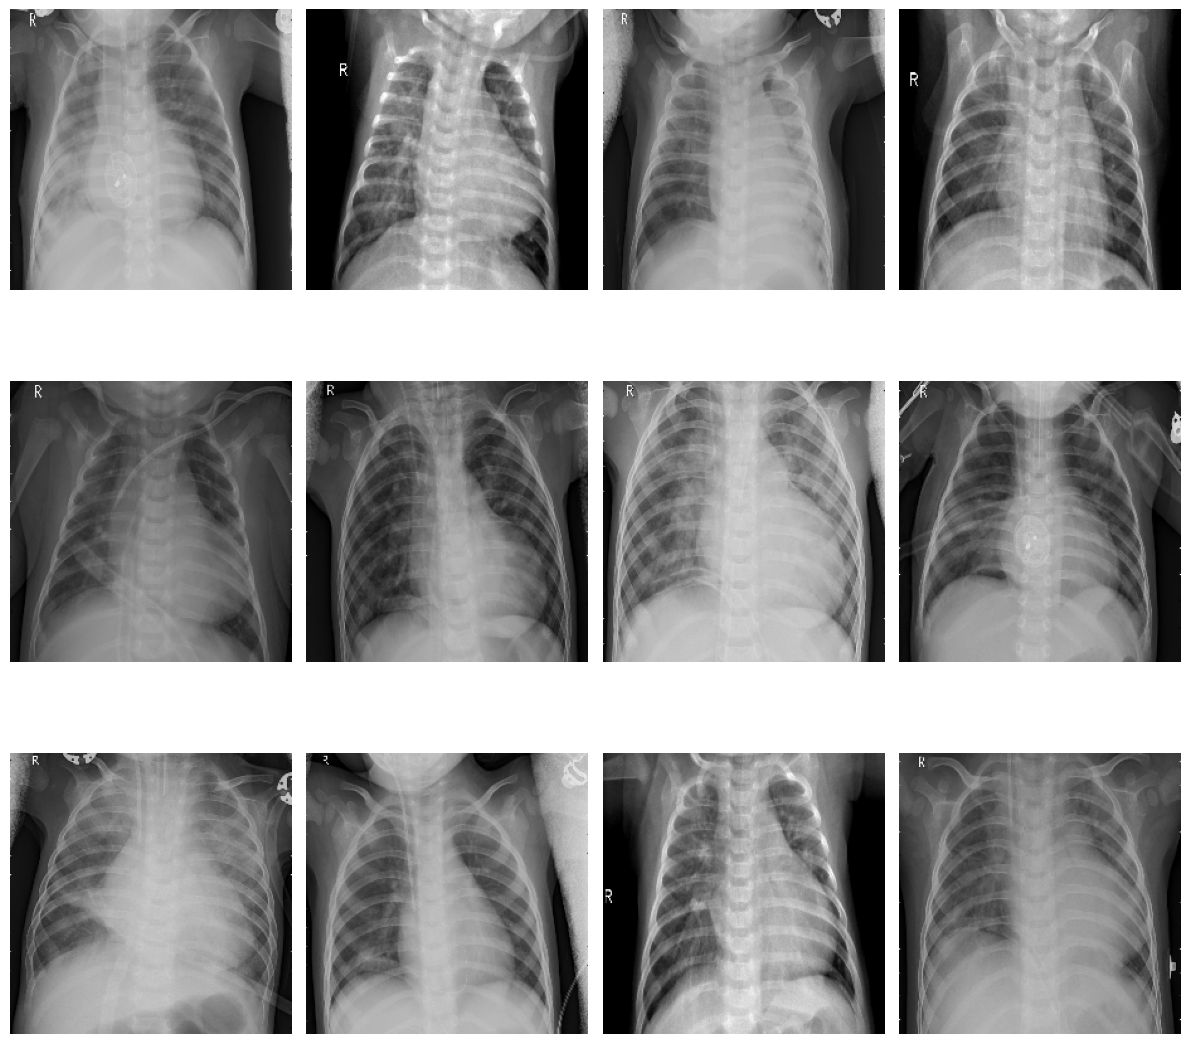

In [ ]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

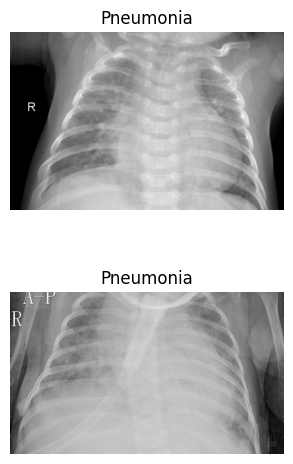

In [ ]:
# Display sample images with both classes
normal_samples = df_train[df_train['class'] == 'Normal'].sample(3)
pneumonia_samples = df_train[df_train['class'] == 'Pneumonia'].sample(3)
sample_df = pd.concat([normal_samples, pneumonia_samples])

plt.figure(figsize=(12, 6))
for i, row in sample_df.iterrows():
    img = cv2.imread(row['image'])
    plt.subplot(2, 3, i % 6 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(row['class'])
    plt.axis('off')
plt.show()

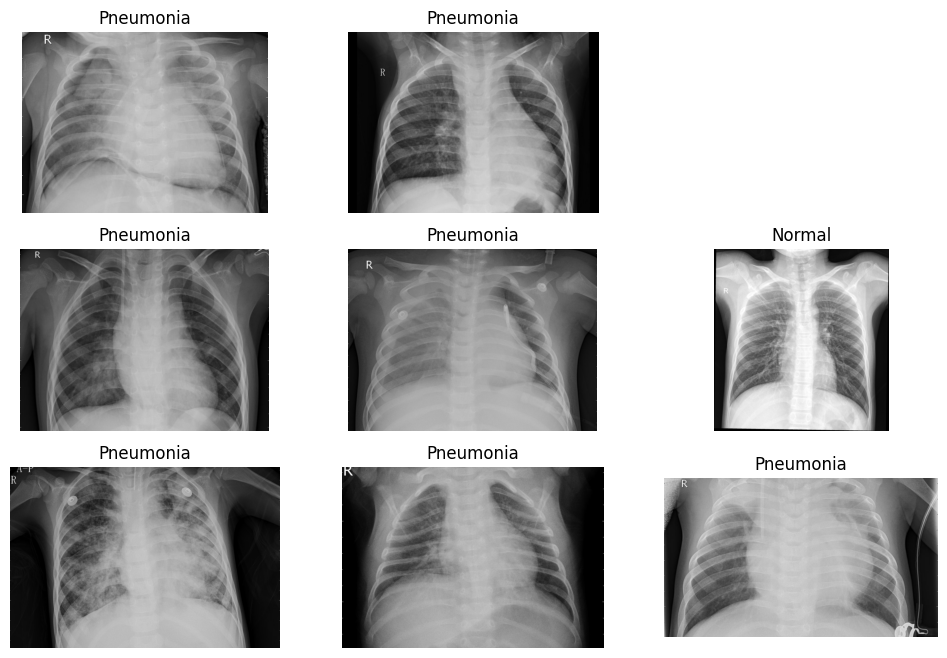

In [ ]:
# Visualize a few images with their corresponding labels
sample_df = df_train.sample(9)

plt.figure(figsize=(12, 8))
for i, row in sample_df.iterrows():
    img = cv2.imread(row['image'])
    plt.subplot(3, 3, i % 9 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(row['class'])
    plt.axis('off')

plt.show()

# Preparing Data

First, we need to create a validation set. To do that, we apply a simple stratified split on the original train dataset, using 80% for actual training and 20% for validation purposes.

In [ ]:
# Import necessary libraries for data preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train['class'])

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Create data generators for training and validation
train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col='image', y_col='class', target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH, class_mode='binary')
val_generator = datagen.flow_from_dataframe(dataframe=val_df, x_col='image', y_col='class', target_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH, class_mode='binary')

Found 4233 validated image filenames belonging to 2 classes.
Found 1059 validated image filenames belonging to 2 classes.


In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [ ]:
train_df

class  \
1911  Pneumonia   
2873  Pneumonia   
2979  Pneumonia   
3069  Pneumonia   
708      Normal   
...         ...   
2031  Pneumonia   
5076  Pneumonia   
817      Normal   
1254     Normal   
2105  Pneumonia   

                                                                                         image  
1911     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-6835737-0001.jpeg  
2873  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-9496210-0001.jpeg  
2979     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-1077882-0001.jpeg  
3069     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-1538177-0006.jpeg  
708        /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-8201650-0001.jpeg  
...                                                                                        ...  
2031     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-7792467-0002.jpeg  
5076  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-3643463-0001.jpeg  
817        /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-8813966-0002.jpeg  
1254       /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
2105     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-8285776-0004.jpeg  

[4233 rows x 2 columns]

In [ ]:
val_df

class  \
1420  Pneumonia   
1134     Normal   
1774  Pneumonia   
4245  Pneumonia   
1072     Normal   
...         ...   
1633  Pneumonia   
1297     Normal   
4913  Pneumonia   
1274     Normal   
1739  Pneumonia   

                                                                                         image  
1420     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-3874052-0003.jpeg  
1134       /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-2154341-0002.jpeg  
1774     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-6121529-0003.jpeg  
4245  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-7433321-0001.jpeg  
1072       /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-1530010-0001.jpeg  
...                                                                                        ...  
1633      /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-516591-0003.jpeg  
1297       /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-3229887-0001.jpeg  
4913  /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/BACTERIA-3030593-0003.jpeg  
1274       /content/drive/MyDrive/archive (3)/chest_xray/train/NORMAL/NORMAL-2885344-0001.jpeg  
1739     /content/drive/MyDrive/archive (3)/chest_xray/train/PNEUMONIA/VIRUS-5737325-0001.jpeg  

[1059 rows x 2 columns]

Now, we’re going to load the images from the folders and prepare them to feed our models.

We begin by defining the data generators. With Keras Image Data Generator, we can rescale the pixel values and apply random transformation techniques for data augmentation on the fly. We define two different generators. The val_datagen is used to simply rescale the validation and test sets. The train_datagen includes some transformations to augment the train set.

We apply those generators on each dataset using the flow_from_dataframe method. Apart from the transformations defined in each generator, the images are also resized based on the target_size set

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4233 validated image filenames belonging to 2 classes.
Found 1059 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# Data Augmentation

(-0.5, 1291.5, 1013.5, -0.5)

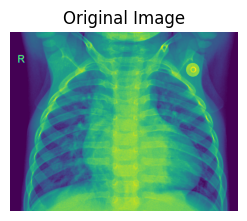

In [ ]:
# Choose a random image from the training set
sample_image_path = train_df['image'].sample(1).values[0]

# Load the original image
original_image = plt.imread(sample_image_path)

# Display the original image
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

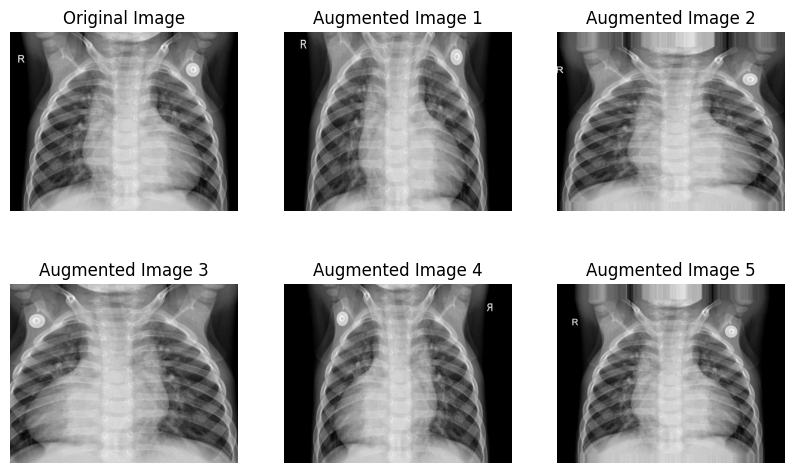

In [ ]:
# Load the original image
original_image = plt.imread(sample_image_path)

# Check if the image is single-channel (grayscale)
if len(original_image.shape) == 2:
    # Add a channel dimension to make it multi-channel
    original_image = np.expand_dims(original_image, axis=-1)

# Display the original image
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(original_image.squeeze(), cmap='gray')  # Squeeze to remove the singleton channel dimension for display
plt.title('Original Image')
plt.axis('off')

# Display augmented images
augmented_images = [datagen.random_transform(original_image) for _ in range(5)]

for i in range(5):
    plt.subplot(2, 3, i + 2)
    plt.imshow(augmented_images[i].squeeze(), cmap='gray')  # Squeeze to remove the singleton channel dimension for display
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')

plt.show()


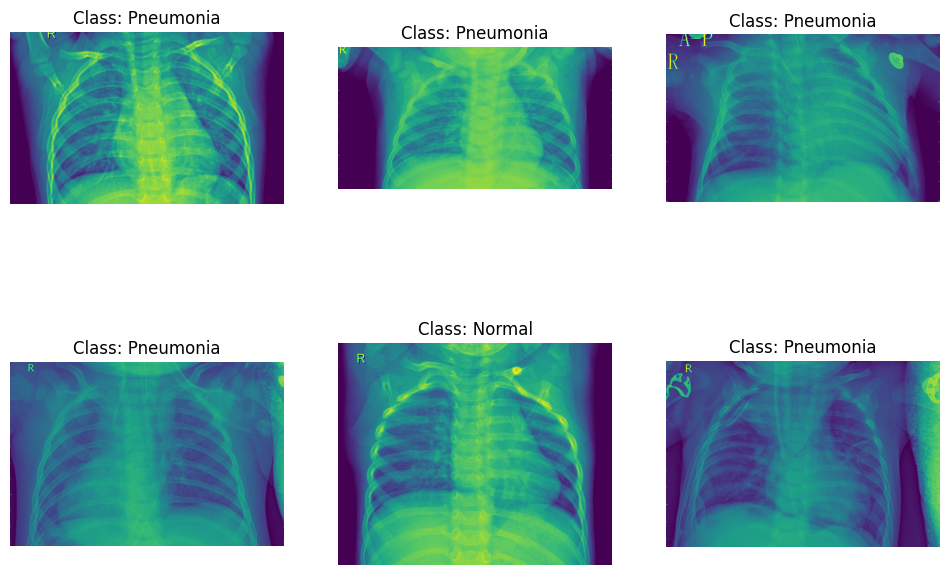

In [ ]:
# Choose a few random images from the validation set
sample_val_images = val_df.sample(6)

plt.figure(figsize=(12, 8))

for i, (_, row) in enumerate(sample_val_images.iterrows(), 1):
    img_path = row['image']
    img = plt.imread(img_path)

    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(f"Class: {row['class']}")
    plt.axis('off')

plt.show()

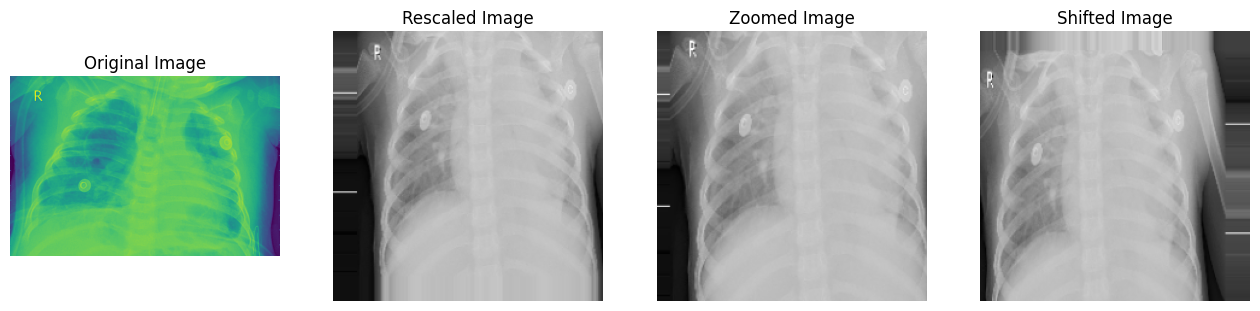

In [ ]:
# Choose a random image from the training set
sample_image_path = train_df['image'].sample(1).values[0]

# Load the original image
original_image = plt.imread(sample_image_path)

# Rescale, zoom, and shift the original image using the data generator
rescaled_image = ds_train[0][0][0]
zoomed_image = ds_train[0][0][0]
shifted_image = ds_train[0][0][0]

# Display the original and augmented images in a single diagram
plt.figure(figsize=(16, 4))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Rescaled Image
plt.subplot(1, 4, 2)
plt.imshow(rescaled_image)
plt.title('Rescaled Image')
plt.axis('off')

# Zoomed Image
plt.subplot(1, 4, 3)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.axis('off')

# Shifted Image
plt.subplot(1, 4, 4)
plt.imshow(shifted_image)
plt.title('Shifted Image')
plt.axis('off')

plt.show()

# Model - CNN

In [ ]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 1,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

132/132 [==============================] - 1801s 14s/step - loss: 0.4617 - binary_accuracy: 0.7987 - val_loss: 1.0181 - val_binary_accuracy: 0.7450 - lr: 3.0000e-05


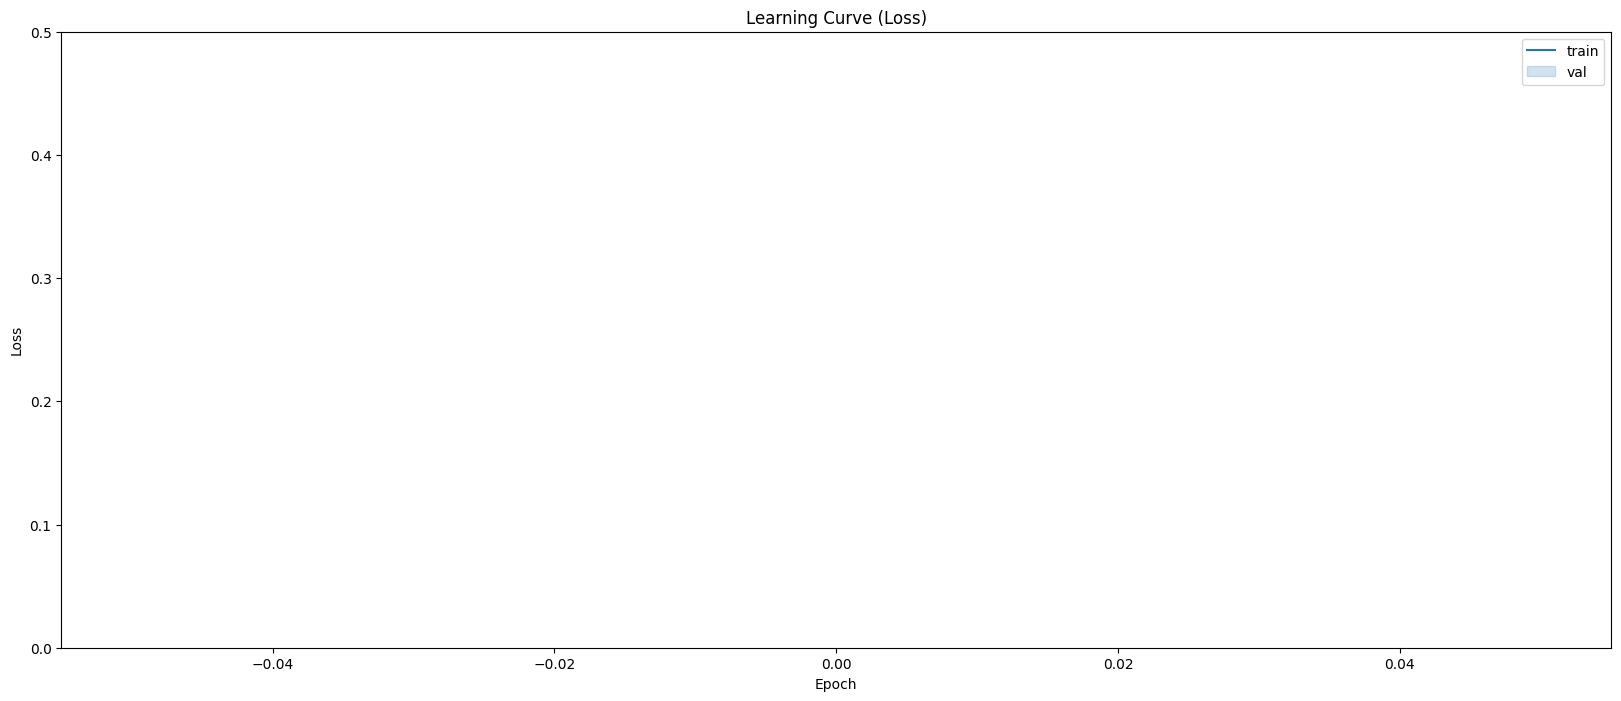

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

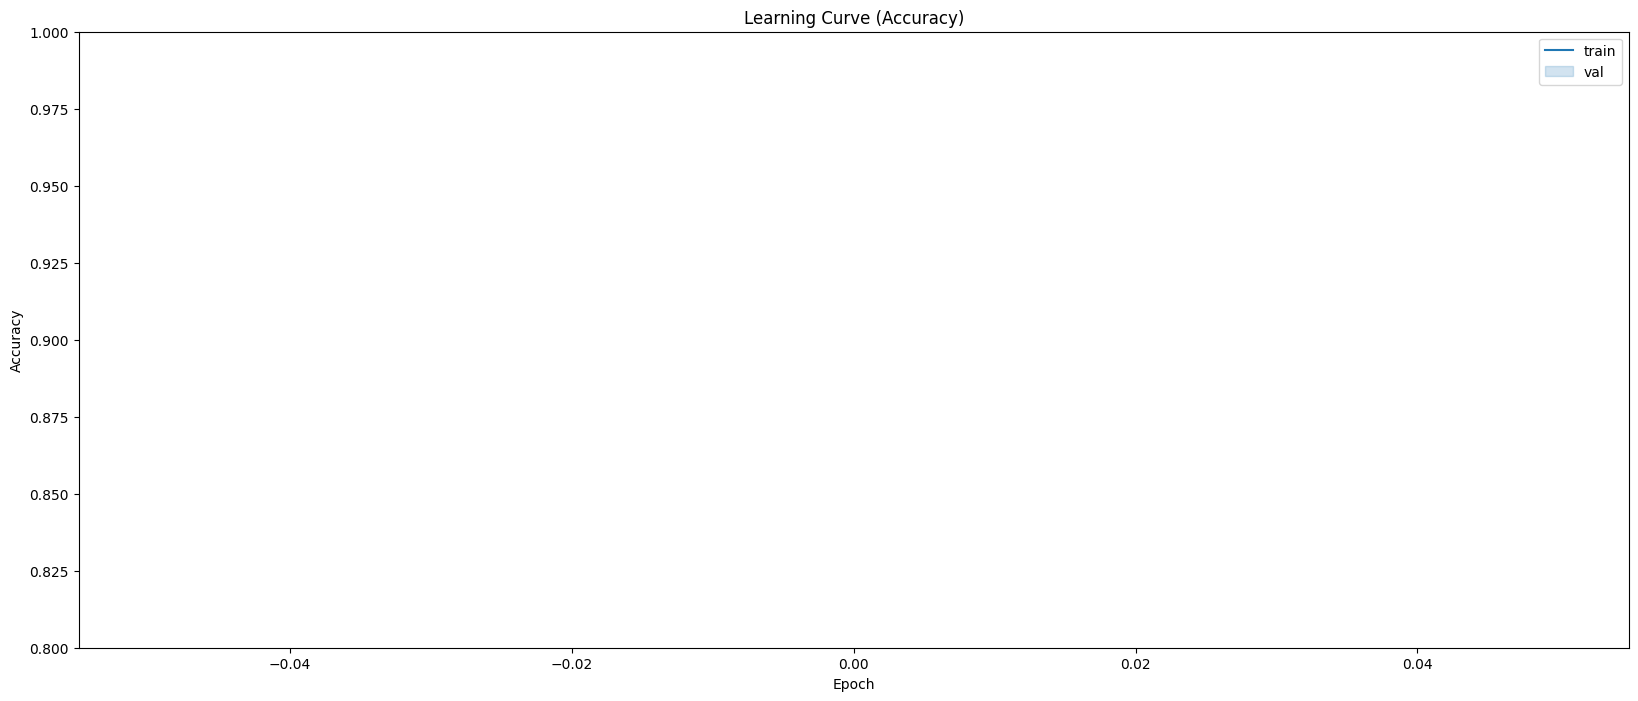

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 1.018072485923767
Val accuracy: 0.7450425028800964


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4954638481140137
Test accuracy: 0.625


In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

# VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models


In [ ]:
# Define paths
test_dir = '/content/drive/MyDrive/archive (3)/chest_xray/test'
train_dir = '/content/drive/MyDrive/archive (3)/chest_xray/train'

In [ ]:
# Set up data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (Normal or Pneumonia)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5292 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Build the model on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=1,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

165/165 [==============================] - 3726s 22s/step - loss: 0.1824 - accuracy: 0.9287 - val_loss: 0.1742 - val_accuracy: 0.9326


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc}')

19/19 [==============================] - 356s 19s/step - loss: 0.1748 - accuracy: 0.9326
Test Accuracy: 0.9325658082962036


In [ ]:
# Get predictions for the test set
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.round(y_pred_probs)

15/20 [=====================>........] - ETA: 1:47

In [ ]:
 # Convert probabilities to class labels
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.36      0.36      0.36       234
   Pneumonia       0.61      0.61      0.61       390

    accuracy                           0.52       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.52      0.52       624



In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 85 149]
 [153 237]]


In [ ]:
# Extract TP, TN, FP, FN for further analysis if needed
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

In [ ]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.5160
Precision: 0.6140
Recall: 0.6077
F1 Score: 0.6108


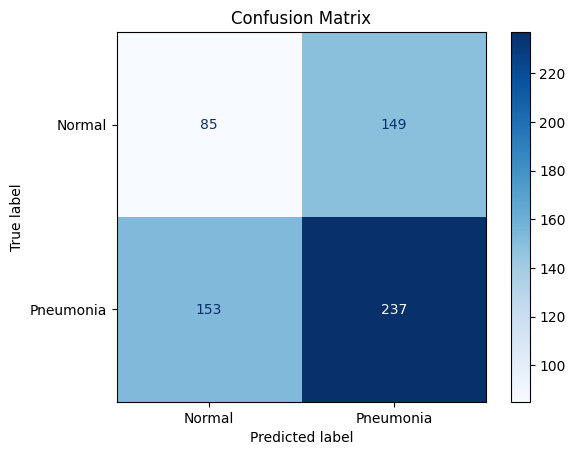

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Pneumonia'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Transfer Learning

In [ ]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

234545216/234545216 [==============================] - 5s 0us/step


In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
 history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 1,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

132/132 [==============================] - 2754s 20s/step - loss: 0.3109 - binary_accuracy: 0.8720 - val_loss: 0.1715 - val_binary_accuracy: 0.9424 - lr: 5.0000e-05


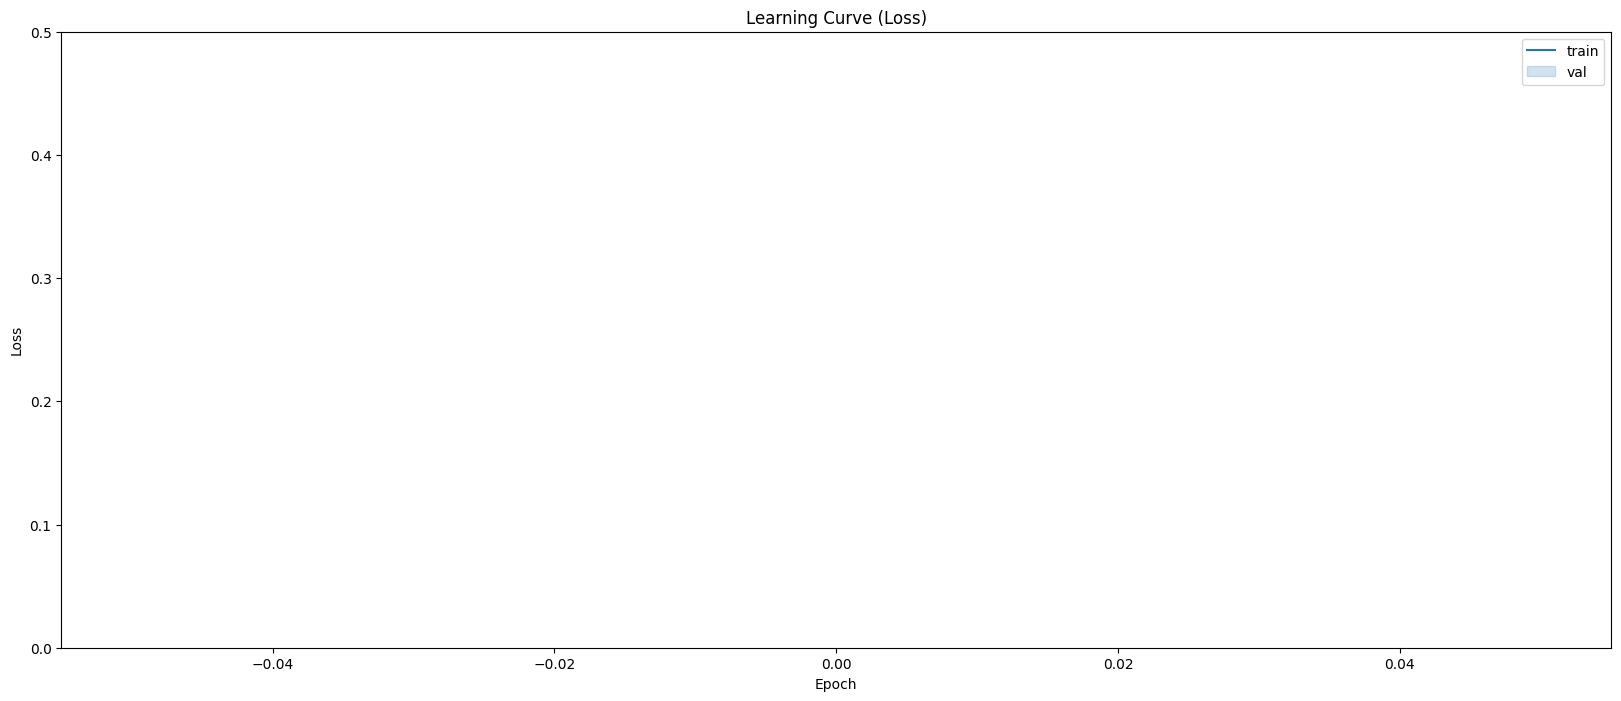

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

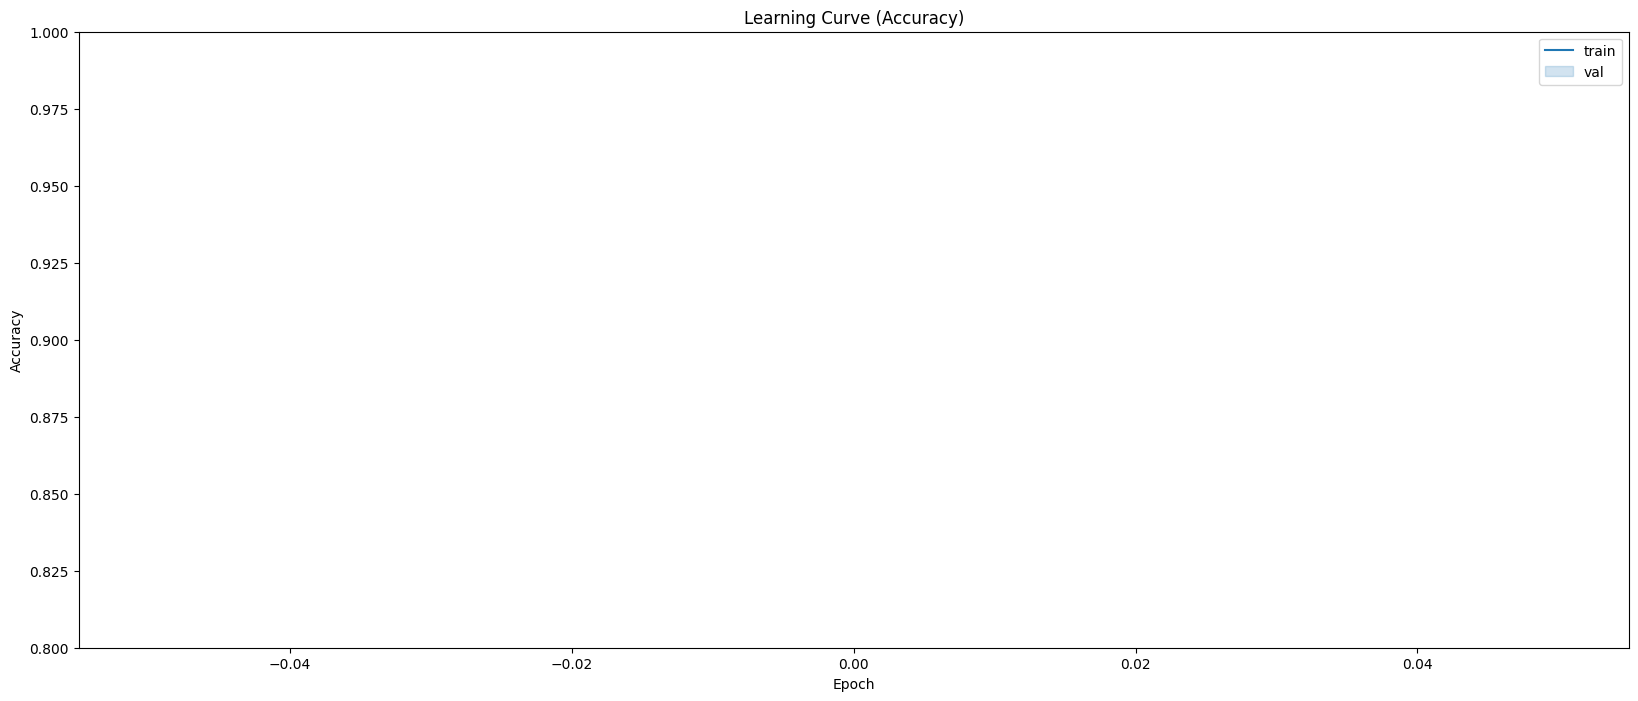

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Fine Tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [ ]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=2e-6), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 0,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

KeyError: ignored

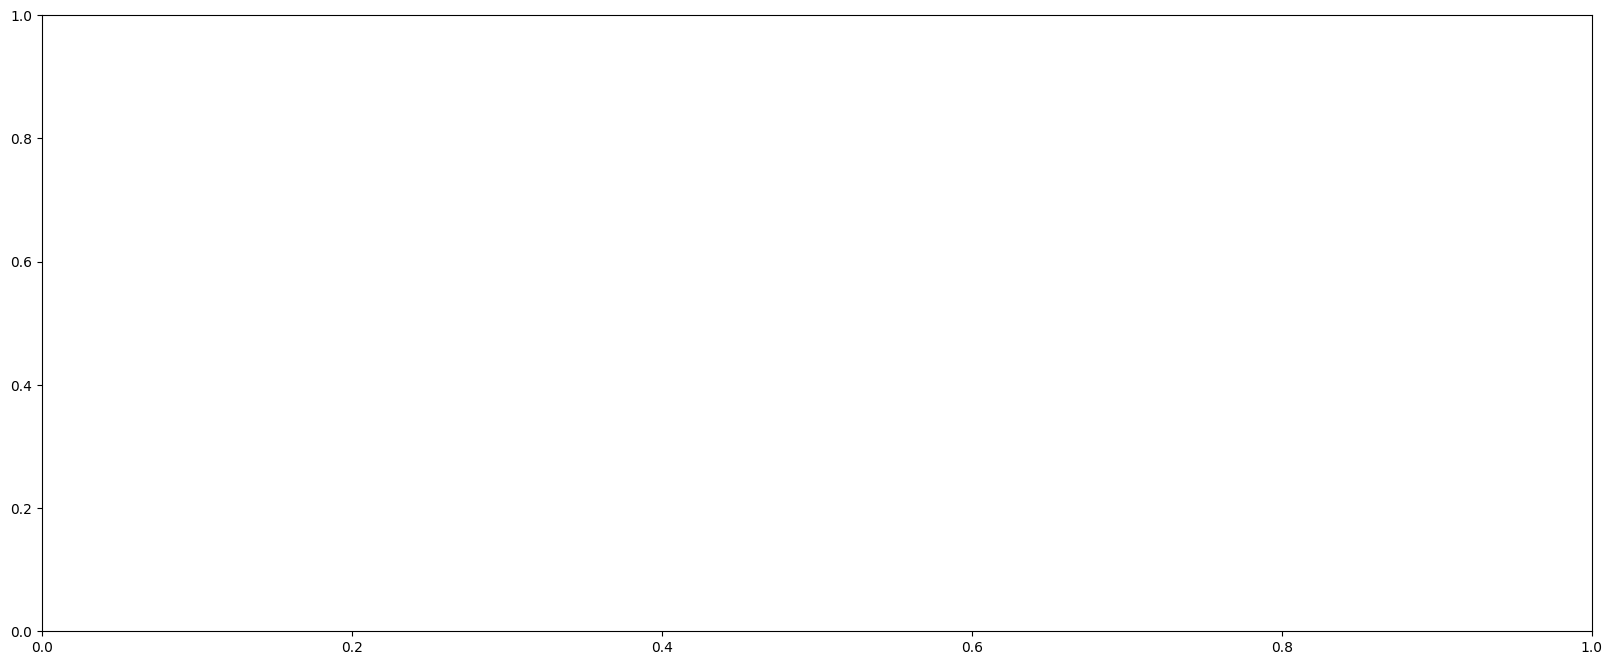

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

KeyError: ignored

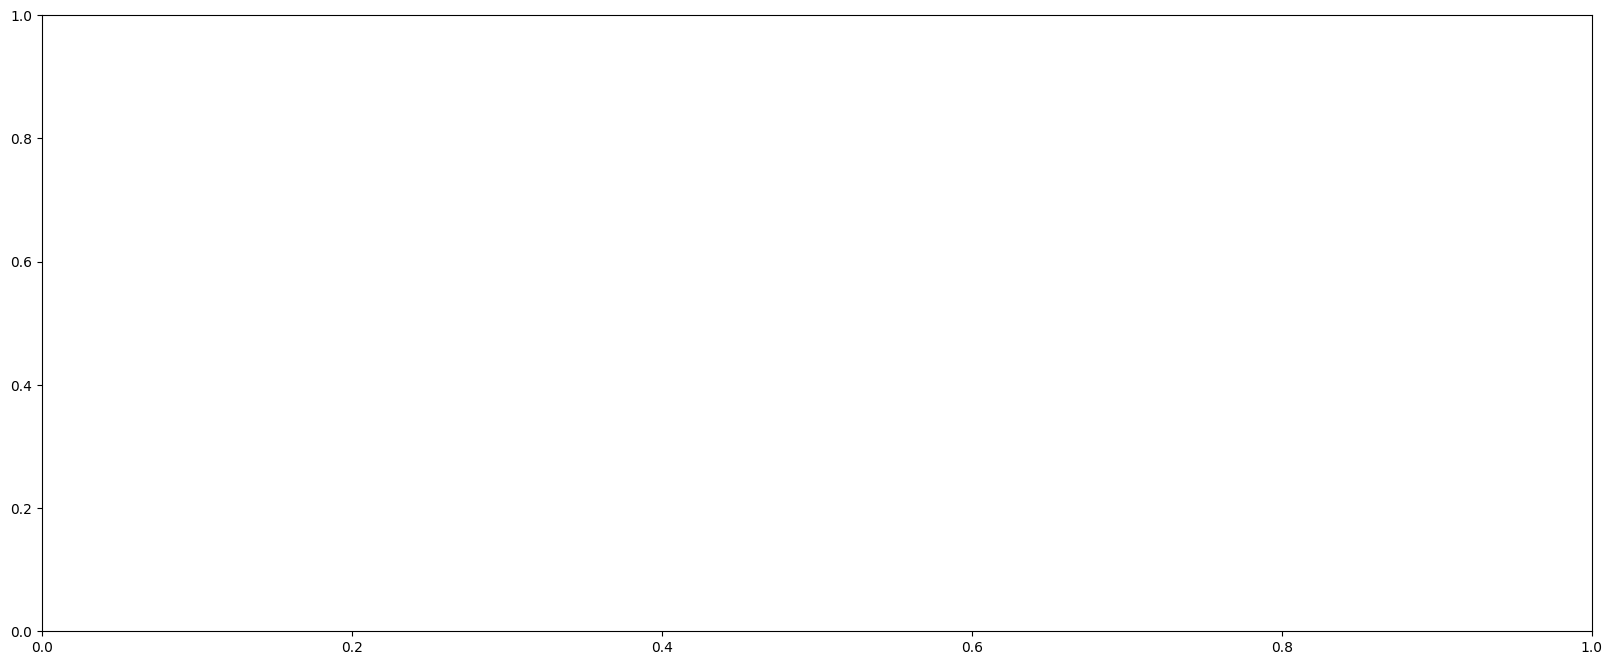

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Performance Metrics

In [ ]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.8413461538461539


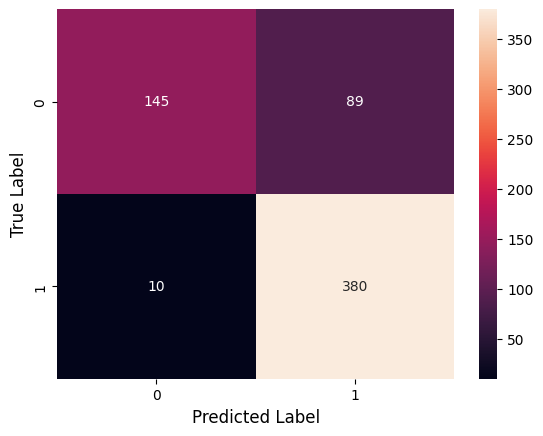

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75       234
           1       0.81      0.97      0.88       390

    accuracy                           0.84       624
   macro avg       0.87      0.80      0.82       624
weighted avg       0.86      0.84      0.83       624



ROC_AUC:  0.9516874863028709


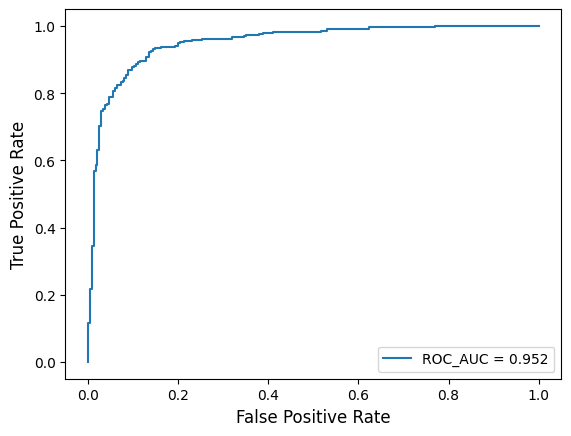

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()